In [1]:
from jmarkov.ctmc import ctmc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Estimar tasa de Poisson

In [4]:
# leer excel
df = pd.read_excel("fabrica_papel.xlsx")
df

,id_rollo,id_lote,tiempo_entre_llegadas,peso,longitud
0,1,1,7.580508,503.556137,98.173125
1,2,1,7.807195,479.862020,107.402817
2,3,1,9.484788,492.965665,103.301277
3,4,1,16.371784,498.011138,98.078701
4,5,1,36.504883,511.179924,100.827708
...,...,...,...,...,...
995,996,10,28.086941,434.101150,93.130072
996,997,10,47.409307,508.062992,108.060990
997,998,10,18.352347,503.701301,96.037015
998,999,10,27.865058,511.799230,100.032015


In [5]:
# Calcular tiempos entre llegadas a partir del DataFrame
inter_arrivals = df["tiempo_entre_llegadas"]
inter_arrivals

0       7.580508
1       7.807195
2       9.484788
3      16.371784
4      36.504883
         ...    
995    28.086941
996    47.409307
997    18.352347
998    27.865058
999     1.069744
Name: tiempo_entre_llegadas, Length: 1000, dtype: float64

<Axes: >

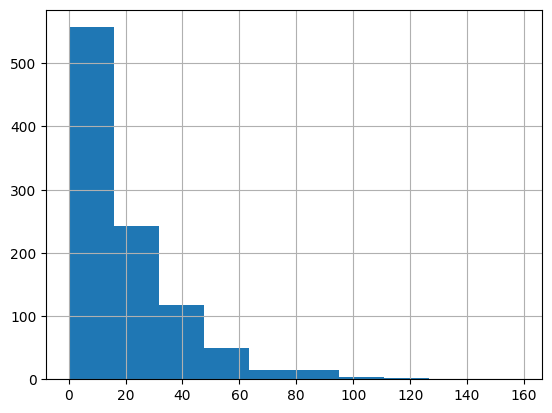

In [5]:
inter_arrivals.hist()

In [6]:
# Estimador de lambda para Poisson:(1 / media de inter_arrivals)
lambda_estimada = 1 / inter_arrivals.mean()

print("Tasa estimada (λ):", lambda_estimada)


Tasa estimada (λ): 0.051054383107087965


Crear estados

In [7]:
estados = []

for i in range(4):
    for j in range(3):
        for k in range(3):
            estados.append(f"{i},{j},{k}")
            
estados

['0,0,0',
 '0,0,1',
 '0,0,2',
 '0,1,0',
 '0,1,1',
 '0,1,2',
 '0,2,0',
 '0,2,1',
 '0,2,2',
 '1,0,0',
 '1,0,1',
 '1,0,2',
 '1,1,0',
 '1,1,1',
 '1,1,2',
 '1,2,0',
 '1,2,1',
 '1,2,2',
 '2,0,0',
 '2,0,1',
 '2,0,2',
 '2,1,0',
 '2,1,1',
 '2,1,2',
 '2,2,0',
 '2,2,1',
 '2,2,2',
 '3,0,0',
 '3,0,1',
 '3,0,2',
 '3,1,0',
 '3,1,1',
 '3,1,2',
 '3,2,0',
 '3,2,1',
 '3,2,2']

In [8]:
len(estados)

36

In [9]:
# Usamos numpy
matrizQ = np.zeros((len(estados), len(estados)), dtype = float)
matrizQ

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Usamos pandas para asignarle nombres a las filas y columnas
matrizQ = pd.DataFrame(matrizQ, index=estados, columns=estados)
matrizQ

,"0,0,0","0,0,1","0,0,2","0,1,0","0,1,1","0,1,2","0,2,0","0,2,1","0,2,2","1,0,0",...,"2,2,2","3,0,0","3,0,1","3,0,2","3,1,0","3,1,1","3,1,2","3,2,0","3,2,1","3,2,2"
"0,0,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,0,1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,0,2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,1,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,1,1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,1,2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,2,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,2,1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"0,2,2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,0,0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
estados[5]

'0,1,2'

In [12]:
# Para conocer el valor del estado de cada variable 
np.array(estados[5].split(','), dtype=int)

array([0, 1, 2])

In [13]:
for fila in estados: # estado actual
    for columna in estados: # estado siguiente

        i,j,k  = np.array(fila.split(','), dtype=int)
        l,m,n = np.array(columna.split(','), dtype=int)

        # Llegadas a la primera zona (prensas presión)
        if i<3 and l==i+1 and m==j and n==k:
            matrizQ.loc[fila,columna] = lambda_estimada # usamos loc porque es un dataframe de pandas
        
        # Procesamiento prensa presión (zona 1)
        if i>0 and j<2 and l==i-1 and m==j+1 and n==k:
            matrizQ.loc[fila,columna] = 0.1036605

        # Procesamiento zona recubrimiento (zona 2)
        if j>0 and k<2 and l==i and m==j-1 and n==k+1:
            matrizQ.loc[fila,columna] = 0.125*min(j,2)
        
        # Procesamiento máquina satinadora (zona 3)
        if k>0 and l==i and m==j and n==k-1:
            matrizQ.loc[fila,columna] = (11/12)*0.2

matrizQ

,"0,0,0","0,0,1","0,0,2","0,1,0","0,1,1","0,1,2","0,2,0","0,2,1","0,2,2","1,0,0",...,"2,2,2","3,0,0","3,0,1","3,0,2","3,1,0","3,1,1","3,1,2","3,2,0","3,2,1","3,2,2"
"0,0,0",0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,0,1",0.183333,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,0,2",0.000000,0.183333,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,0",0.000000,0.125000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,1",0.000000,0.000000,0.125,0.183333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,2",0.000000,0.000000,0.000,0.000000,0.183333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,0",0.000000,0.000000,0.000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,1",0.000000,0.000000,0.000,0.000000,0.000000,0.250000,0.183333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,2",0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.183333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"1,0,0",0.000000,0.000000,0.000,0.103661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
for i in range(len(estados)):
    # Diagonal: negativo de la suma de la fila
    matrizQ.iloc[i, i] = -np.sum(matrizQ.iloc[i, :])
matrizQ

,"0,0,0","0,0,1","0,0,2","0,1,0","0,1,1","0,1,2","0,2,0","0,2,1","0,2,2","1,0,0",...,"2,2,2","3,0,0","3,0,1","3,0,2","3,1,0","3,1,1","3,1,2","3,2,0","3,2,1","3,2,2"
"0,0,0",-0.051054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,0,1",0.183333,-0.234388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,0,2",0.000000,0.183333,-0.234388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,0",0.000000,0.125000,0.000000,-0.176054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,1",0.000000,0.000000,0.125000,0.183333,-0.359388,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,1,2",0.000000,0.000000,0.000000,0.000000,0.183333,-0.234388,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,0",0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,-0.301054,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,1",0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.183333,-0.484388,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"0,2,2",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183333,-0.234388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"1,0,0",0.000000,0.000000,0.000000,0.103661,0.000000,0.000000,0.000000,0.000000,0.000000,-0.154715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# Volver a pasar a array para usar jmarkov
matrizQ = np.array(matrizQ)

In [16]:
cadenaContinua = ctmc(matrizQ)

## Literal b

In [17]:
t_total = 25200 # 7 horas = 7*60*60 = 25200 segundos

matrizTiempos = cadenaContinua.occupation_time(t_total) # M(t) : matriz de tiempos de ocupación
matrizTiempos

array([[6.30331256e+03, 1.75124401e+03, 4.15118596e+02, ...,
        3.74570004e+01, 4.39655853e+00, 3.64609607e+00],
       [6.29894477e+03, 1.75548222e+03, 4.15220726e+02, ...,
        3.74571733e+01, 4.39678934e+00, 3.64632603e+00],
       [6.29525410e+03, 1.75445445e+03, 4.19605017e+02, ...,
        3.74594151e+01, 4.39844215e+00, 3.64842934e+00],
       ...,
       [6.27638857e+03, 1.74920080e+03, 4.15509113e+02, ...,
        4.19545996e+01, 4.53558798e+00, 3.72974718e+00],
       [6.27567894e+03, 1.74900319e+03, 4.15463321e+02, ...,
        3.97687497e+01, 6.99377373e+00, 4.00232213e+00],
       [6.27431711e+03, 1.74862395e+03, 4.15373354e+02, ...,
        3.97606272e+01, 6.99281980e+00, 9.45607626e+00]], shape=(36, 36))

In [18]:
estados.index('0,0,0')

0

In [19]:
estados.index('3,2,2')

35

In [20]:
tiempo = matrizTiempos[estados.index('0,0,0'), estados.index('3,2,2')]
tiempo

np.float64(3.6460960697723586)

In [21]:
proporcion = tiempo/t_total
proporcion

np.float64(0.0001446863519750936)

La proporción del tiempo que las estaciones permanecen llenas es del 0.013%.

## Literal c

In [116]:
# Se verifica irreducibilidad 
cadenaContinua.is_irreducible()

True

In [117]:
# Creamos el vector para evaluar en el largo plazo
vector = cadenaContinua.steady_state() # pi: probabilidades de estar en cada estado en el largo plazo
vector

array([2.49667538e-01, 6.95270299e-02, 1.64940109e-02, 1.06179038e-01,
       3.09279483e-02, 9.48823909e-03, 2.23703339e-02, 4.92608678e-03,
       2.18521668e-03, 1.25632823e-01, 3.64944290e-02, 9.57360806e-03,
       5.62564444e-02, 1.91539966e-02, 4.94101367e-03, 1.70789559e-02,
       2.84590669e-03, 1.36022567e-03, 6.56305287e-02, 2.03995271e-02,
       4.57655515e-03, 3.35503048e-02, 8.46657321e-03, 1.99936620e-03,
       6.66387535e-03, 9.63415586e-04, 5.20960900e-04, 4.78502074e-02,
       8.77881966e-03, 1.76313906e-03, 9.23791738e-03, 2.17885469e-03,
       5.08017548e-04, 1.48912990e-03, 1.74885983e-04, 1.45076386e-04])

Probabilidad de que en el largo plazo haya exactamente 0 rollos en prensa, 1 rollo en recubrimiento y 1 rollo en alisado:

In [118]:
vector[estados.index('0,1,1')]

np.float64(0.030927948345209275)

Valor esperado del número total de rollos a largo plazo:

In [119]:
num_esperado=0 # acumular la suma

for e in estados:
    i,j,k = np.array(e.split(','), dtype=int) # obtener los valores de cada variable
    num_esperado +=  (i+j+k)*vector[estados.index(e)] # estados.index(e) saca el índice del estado e para buscarlo en el vector y multiplicarlo por el número total de piezas en ese estado

num_esperado

np.float64(1.491541946676064)

## Literal d

In [120]:
# tiempo primera pasada = cadena.first_passage_time(estado inicial)[estado de interés]

In [121]:
cadenaContinua.first_passage_time(estados.index('3,2,2'))[estados.index('1,1,1')]

array([39953.10367284])